In [ ]:
import os
from glob import glob
import pandas as pd
from functools import reduce
from xml.etree import ElementTree as et

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/My Drive/data_preparation/data_images'

# Lista alla filer i mappen
file_list = os.listdir(folder_path)

# Skriv ut filerna
print(file_list)

['008997.jpg', '008995.jpg', '008988.xml', '008985.xml', '008995.xml', '008989.jpg', '008999.jpg', '008988.jpg', '008987.xml', '009006.jpg', '009006.xml', '008999.xml', '009002.jpg', '009005.jpg', '009004.xml', '009005.xml', '009000.jpg', '009007.xml', '009015.xml', '009004.jpg', '009000.xml', '009002.xml', '009007.jpg', '009015.jpg', '009027.jpg', '009024.xml', '009018.jpg', '009019.jpg', '009020.jpg', '009029.jpg', '009020.xml', '009019.xml', '009024.jpg', '009022.xml', '009018.xml', '009022.jpg', '009016.jpg', '009016.xml', '009027.xml', '009037.jpg', '009036.jpg', '009035.jpg', '009036.xml', '009032.xml', '009045.xml', '009037.xml', '009029.xml', '009039.jpg', '009042.xml', '009045.jpg', '009032.jpg', '009039.xml', '009034.xml', '009042.jpg', '009034.jpg', '009035.xml', '009053.xml', '009058.jpg', '009058.xml', '009051.xml', '009048.xml', '009049.jpg', '009053.jpg', '009051.jpg', '009049.xml', '009059.jpg', '009048.jpg', '009063.jpg', '009064.xml', '009064.jpg', '009059.xml', '0090

In [ ]:
# load all xml files and store in a list
xmlfiles = glob(f"{folder_path}/*.xml")

In [ ]:
xmlfiles

['/content/drive/My Drive/data_preparation/data_images/008988.xml',
 '/content/drive/My Drive/data_preparation/data_images/008985.xml',
 '/content/drive/My Drive/data_preparation/data_images/008995.xml',
 '/content/drive/My Drive/data_preparation/data_images/008987.xml',
 '/content/drive/My Drive/data_preparation/data_images/009006.xml',
 '/content/drive/My Drive/data_preparation/data_images/008999.xml',
 '/content/drive/My Drive/data_preparation/data_images/009004.xml',
 '/content/drive/My Drive/data_preparation/data_images/009005.xml',
 '/content/drive/My Drive/data_preparation/data_images/009007.xml',
 '/content/drive/My Drive/data_preparation/data_images/009015.xml',
 '/content/drive/My Drive/data_preparation/data_images/009000.xml',
 '/content/drive/My Drive/data_preparation/data_images/009002.xml',
 '/content/drive/My Drive/data_preparation/data_images/009024.xml',
 '/content/drive/My Drive/data_preparation/data_images/009020.xml',
 '/content/drive/My Drive/data_preparation/data_

In [ ]:
# step-2: read xml files
# from ech xml file we need to extract
# filename, size(width, height), object(name, xmin, xmax, ymin, ymax)
def extract_text(filename):
  tree = et.parse(filename)
  root = tree.getroot()

  # extract filename
  image_name = root.find('filename').text
  # extract width and height from the image
  width = root.find('size').find('width').text
  height = root.find('size').find('height').text
  # Get the information from each object
  objs = root.findall('object')
  parser = []
  for obj in objs:
    name = obj.find('name').text
    bndbox = obj.find('bndbox')
    xmin = bndbox.find('xmin').text
    xmax = bndbox.find('xmax').text
    ymin = bndbox.find('ymin').text
    ymax = bndbox.find('ymax').text
    parser.append([image_name, width, height, name, xmin, xmax, ymin, ymax])

  return parser

In [ ]:
parser_all = list(map(extract_text, xmlfiles))

In [ ]:
parser_all

[[['008988.jpg', '500', '375', 'train', '2', '375', '95', '329']],
 [['008985.jpg', '375', '500', 'bird', '3', '314', '9', '496']],
 [['008995.jpg', '156', '500', 'bicycle', '31', '121', '381', '439']],
 [['008987.jpg', '500', '333', 'sofa', '302', '449', '129', '227'],
  ['008987.jpg', '500', '333', 'sofa', '93', '288', '156', '312'],
  ['008987.jpg', '500', '333', 'pottedplant', '89', '116', '204', '262']],
 [['009006.jpg', '500', '334', 'car', '161', '191', '168', '187'],
  ['009006.jpg', '500', '334', 'car', '195', '231', '167', '188'],
  ['009006.jpg', '500', '334', 'car', '263', '298', '169', '188'],
  ['009006.jpg', '500', '334', 'car', '285', '343', '176', '211']],
 [['008999.jpg', '500', '375', 'boat', '53', '86', '78', '170'],
  ['008999.jpg', '500', '375', 'boat', '160', '191', '65', '171'],
  ['008999.jpg', '500', '375', 'boat', '222', '238', '125', '162'],
  ['008999.jpg', '500', '375', 'boat', '248', '284', '43', '175'],
  ['008999.jpg', '500', '375', 'boat', '309', '329'

In [ ]:
# Bringing data in 2d forms with rows and columns
data = reduce(lambda x, y : x+y, parser_all)

In [ ]:
# Creating columns
df = pd.DataFrame(data,columns = ['filename', 'width', 'height', 'name', 'xmin', 'xmax', 'ymin', 'ymax'])

In [ ]:
df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax
0,008988.jpg,500,375,train,2,375,95,329
1,008985.jpg,375,500,bird,3,314,9,496
2,008995.jpg,156,500,bicycle,31,121,381,439
3,008987.jpg,500,333,sofa,302,449,129,227
4,008987.jpg,500,333,sofa,93,288,156,312


In [ ]:
df.shape

(15708, 8)

In [ ]:
df['name'].value_counts()

person         5459
car            1654
chair          1429
bottle          641
pottedplant     629
bird            600
dog             538
sofa            427
bicycle         420
horse           408
boat            399
cat             392
motorbike       391
tvmonitor       369
cow             356
sheep           353
aeroplane       331
train           328
diningtable     311
bus             273
Name: name, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15708 entries, 0 to 15707
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  15708 non-null  object
 1   width     15708 non-null  object
 2   height    15708 non-null  object
 3   name      15708 non-null  object
 4   xmin      15708 non-null  object
 5   xmax      15708 non-null  object
 6   ymin      15708 non-null  object
 7   ymax      15708 non-null  object
dtypes: object(8)
memory usage: 981.9+ KB


The formulas to calculate values for YOLO model:

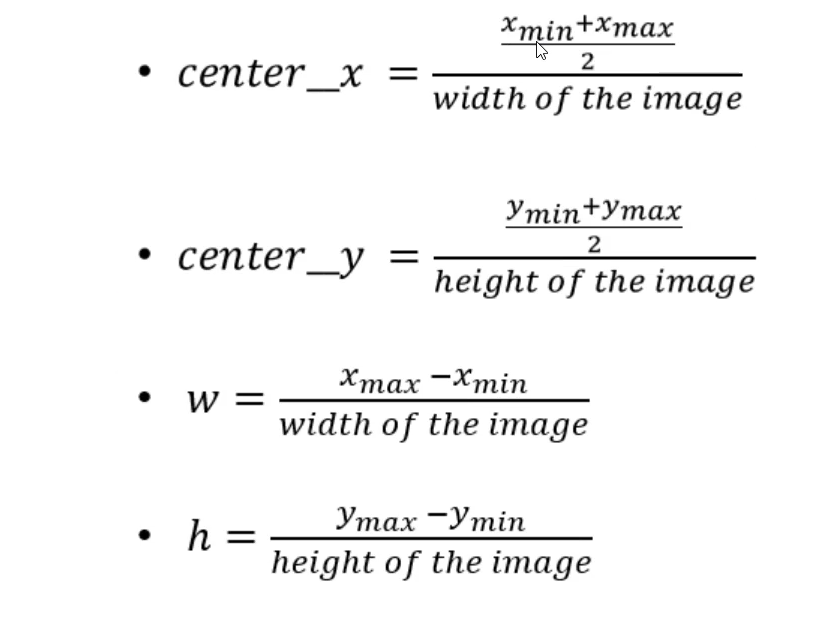

In [ ]:
# Type conversions
cols = ['width', 'height', 'xmin', 'xmax', 'ymin', 'ymax']
df[cols] = df[cols].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15708 entries, 0 to 15707
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  15708 non-null  object
 1   width     15708 non-null  int64 
 2   height    15708 non-null  int64 
 3   name      15708 non-null  object
 4   xmin      15708 non-null  int64 
 5   xmax      15708 non-null  int64 
 6   ymin      15708 non-null  int64 
 7   ymax      15708 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 981.9+ KB


In [ ]:
# Convert the data to apply to YOLO
# Frist center x, center y
df['center_x'] = ((df['xmax']+df['xmin'])/2)/df['width']
df['center_y'] = ((df['ymax']+df['ymin'])/2)/df['height']
# Width
df['w'] = (df['xmax']-df['xmin'])/df['width']
# Height
df['h'] = (df['ymax']-df['ymin'])/df['height']

In [ ]:
df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
0,008988.jpg,500,375,train,2,375,95,329,0.377000,0.565333,0.746000,0.624000
1,008985.jpg,375,500,bird,3,314,9,496,0.422667,0.505000,0.829333,0.974000
2,008995.jpg,156,500,bicycle,31,121,381,439,0.487179,0.820000,0.576923,0.116000
3,008987.jpg,500,333,sofa,302,449,129,227,0.751000,0.534535,0.294000,0.294294
4,008987.jpg,500,333,sofa,93,288,156,312,0.381000,0.702703,0.390000,0.468468


Split data into train and test

In [ ]:
df['filename']

0        008988.jpg
1        008985.jpg
2        008995.jpg
3        008987.jpg
4        008987.jpg
            ...    
15703    000035.jpg
15704    000035.jpg
15705    000035.jpg
15706    000035.jpg
15707    000024.jpg
Name: filename, Length: 15708, dtype: object

In [ ]:
images = df['filename'].unique()

In [ ]:
len(images)

5012

In [ ]:
# Split train(80%) and test(20%)

# Shuffle the images
img_df = pd.DataFrame(images, columns=['filename'])
img_df.head()
# Shuffle and pick 80% of images
img_train = tuple(img_df.sample(frac=0.8)['filename'])

In [ ]:
img_train

('008848.jpg',
 '003773.jpg',
 '004722.jpg',
 '004031.jpg',
 '001941.jpg',
 '004141.jpg',
 '007138.jpg',
 '005868.jpg',
 '001127.jpg',
 '000001.jpg',
 '005391.jpg',
 '002248.jpg',
 '009000.jpg',
 '008122.jpg',
 '009358.jpg',
 '001841.jpg',
 '006884.jpg',
 '007443.jpg',
 '007585.jpg',
 '001434.jpg',
 '002212.jpg',
 '001872.jpg',
 '002199.jpg',
 '006125.jpg',
 '009437.jpg',
 '008628.jpg',
 '001933.jpg',
 '009732.jpg',
 '004588.jpg',
 '001985.jpg',
 '006725.jpg',
 '002782.jpg',
 '005640.jpg',
 '009325.jpg',
 '006647.jpg',
 '004168.jpg',
 '003575.jpg',
 '005398.jpg',
 '003845.jpg',
 '005032.jpg',
 '003528.jpg',
 '001521.jpg',
 '009392.jpg',
 '002938.jpg',
 '003868.jpg',
 '004687.jpg',
 '001498.jpg',
 '009432.jpg',
 '001978.jpg',
 '007422.jpg',
 '005497.jpg',
 '004455.jpg',
 '007954.jpg',
 '001608.jpg',
 '009709.jpg',
 '000613.jpg',
 '001963.jpg',
 '008492.jpg',
 '005917.jpg',
 '003750.jpg',
 '009208.jpg',
 '006836.jpg',
 '007241.jpg',
 '000921.jpg',
 '007344.jpg',
 '000966.jpg',
 '009230.j

In [ ]:
# Take the files not taken in img_train and send them to img_test
img_test = tuple(img_df.query(f'filename not in {img_train}')['filename'])

In [ ]:
img_test

('009024.jpg',
 '009037.jpg',
 '009042.jpg',
 '009053.jpg',
 '009048.jpg',
 '009066.jpg',
 '009094.jpg',
 '009098.jpg',
 '009108.jpg',
 '009131.jpg',
 '009126.jpg',
 '009148.jpg',
 '009150.jpg',
 '009161.jpg',
 '009175.jpg',
 '009180.jpg',
 '009177.jpg',
 '009185.jpg',
 '009192.jpg',
 '009200.jpg',
 '009224.jpg',
 '009242.jpg',
 '009236.jpg',
 '009238.jpg',
 '009246.jpg',
 '009245.jpg',
 '009249.jpg',
 '009269.jpg',
 '009254.jpg',
 '009285.jpg',
 '009291.jpg',
 '009296.jpg',
 '009288.jpg',
 '009316.jpg',
 '009331.jpg',
 '009351.jpg',
 '009362.jpg',
 '009373.jpg',
 '009374.jpg',
 '009382.jpg',
 '009401.jpg',
 '009406.jpg',
 '009398.jpg',
 '009419.jpg',
 '009420.jpg',
 '009438.jpg',
 '009439.jpg',
 '009429.jpg',
 '009433.jpg',
 '009458.jpg',
 '009455.jpg',
 '009454.jpg',
 '009463.jpg',
 '009481.jpg',
 '009494.jpg',
 '009499.jpg',
 '009490.jpg',
 '009515.jpg',
 '009523.jpg',
 '009537.jpg',
 '009533.jpg',
 '009526.jpg',
 '009528.jpg',
 '009565.jpg',
 '009577.jpg',
 '009580.jpg',
 '009573.j

In [ ]:
len(img_test), len(img_train)

(1002, 4010)

In [ ]:
# Split into train and test df
train_df = df.query(f'filename in {img_train}')
test_df = df.query(f'filename in {img_test}')

In [ ]:
train_df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
0,008988.jpg,500,375,train,2,375,95,329,0.377000,0.565333,0.746000,0.624000
1,008985.jpg,375,500,bird,3,314,9,496,0.422667,0.505000,0.829333,0.974000
2,008995.jpg,156,500,bicycle,31,121,381,439,0.487179,0.820000,0.576923,0.116000
3,008987.jpg,500,333,sofa,302,449,129,227,0.751000,0.534535,0.294000,0.294294
4,008987.jpg,500,333,sofa,93,288,156,312,0.381000,0.702703,0.390000,0.468468


In [ ]:
test_df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
44,009024.jpg,332,500,person,197,278,140,310,0.715361,0.450000,0.243976,0.340000
45,009024.jpg,332,500,horse,163,288,172,360,0.679217,0.532000,0.376506,0.376000
72,009037.jpg,500,375,bus,325,500,166,257,0.825000,0.564000,0.350000,0.242667
74,009042.jpg,500,334,dog,116,406,92,194,0.522000,0.428144,0.580000,0.305389
93,009053.jpg,500,375,car,43,418,82,306,0.461000,0.517333,0.750000,0.597333


Assign id numbers to object names

In [ ]:
# Convert object names into specific id's(label encoding)
def label_encoding(x):
  labels = {'person':0, 'car':1, 'chair':2, 'bottle':3, 'pottedplant':4, 'bird':5, 'dog':6,
            'sofa':7, 'bicycle':8, 'horse':9, 'boat':10, 'motorbike':11, 'cat':12, 'tvmonitor':13,
            'cow':14, 'sheep':14, 'aeroplane':16, 'train':17, 'diningtable':18, 'bus':19}
  return labels

In [ ]:
train_df['id'] = train_df['name'].apply(label_encoding)
test_df['id'] = test_df['name'].apply(label_encoding)

<ipython-input-30-429437bd50d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['id'] = train_df['name'].apply(label_encoding)
<ipython-input-30-429437bd50d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['id'] = test_df['name'].apply(label_encoding)


In [ ]:
train_df.head(10)

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h,id
0,008988.jpg,500,375,train,2,375,95,329,0.377000,0.565333,0.746000,0.624000,"{'person': 0, 'car': 1, 'chair': 2, 'bottle': ..."
1,008985.jpg,375,500,bird,3,314,9,496,0.422667,0.505000,0.829333,0.974000,"{'person': 0, 'car': 1, 'chair': 2, 'bottle': ..."
2,008995.jpg,156,500,bicycle,31,121,381,439,0.487179,0.820000,0.576923,0.116000,"{'person': 0, 'car': 1, 'chair': 2, 'bottle': ..."
3,008987.jpg,500,333,sofa,302,449,129,227,0.751000,0.534535,0.294000,0.294294,"{'person': 0, 'car': 1, 'chair': 2, 'bottle': ..."
4,008987.jpg,500,333,sofa,93,288,156,312,0.381000,0.702703,0.390000,0.468468,"{'person': 0, 'car': 1, 'chair': 2, 'bottle': ..."
5,008987.jpg,500,333,pottedplant,89,116,204,262,0.205000,0.699700,0.054000,0.174174,"{'person': 0, 'car': 1, 'chair': 2, 'bottle': ..."
6,009006.jpg,500,334,car,161,191,168,187,0.352000,0.531437,0.060000,0.056886,"{'person': 0, 'car': 1, 'chair': 2, 'bottle': ..."
7,009006.jpg,500,334,car,195,231,167,188,0.426000,0.531437,0.072000,0.062874,"{'person': 0, 'car': 1, 'chair': 2, 'bottle': ..."
8,009006.jpg,500,334,car,263,298,169,188,0.561000,0.534431,0.070000,0.056886,"{'person': 0, 'car': 1, 'chair': 2, 'bottle': ..."
9,009006.jpg,500,334,car,285,343,176,211,0.628000,0.579341,0.116000,0.104790,"{'person': 0, 'car': 1, 'chair': 2, 'bottle': ..."


Save images and labels in text

In [ ]:
from shutil import move

In [ ]:
#_path = '/content/drive/My Drive/data_preparation/train'
train_folder = '/content/drive/My Drive/data_preparation/data_images/train'
test_folder = '/content/drive/My Drive/data_preparation/data_images/test'

os.mkdir(train_folder)
os.mkdir(test_folder)

In [ ]:
cols = ['filename', 'id', 'center_x', 'center_y', 'w', 'h']
groupby_obj_train = train_df[cols].groupby('filename')
groupby_obj_test = test_df[cols].groupby('filename')

In [ ]:
# folder_path = '/content/drive/My Drive/data_preparation/data_images'
#groupby_obj_train.get_group('008997.jpg').set_index('filename').to_csv('sample.txt', index=False, header=False)
# Save each image in train/test folder and respective labels in .txt
def save_data(filename, folder_path, group_obj):
  # Mov image
  src = os.path.join('/content/drive/My Drive/data_preparation/data_images', filename)
  dst = os.path.join(folder_path, filename)
  # Move image todestination folder
  move(src, dst)

  # Save the labels information
  text_filename = os.path.join(folder_path, os.path.splitext(filename)[0]+'.txt')
  group_obj.get_group(filename).set_index('filename').to_csv(text_filename, sep=' ', index=False, header=False)



In [ ]:
# Apply to the file-names
filename_series = pd.Series(groupby_obj_train.groups.keys())

In [ ]:
filename_series

0       000001.jpg
1       000009.jpg
2       000012.jpg
3       000016.jpg
4       000017.jpg
           ...    
4005    009946.jpg
4006    009949.jpg
4007    009950.jpg
4008    009954.jpg
4009    009961.jpg
Length: 4010, dtype: object

In [ ]:
filename_series.apply(save_data, args=(train_folder, groupby_obj_train))

0       None
1       None
2       None
3       None
4       None
        ... 
4005    None
4006    None
4007    None
4008    None
4009    None
Length: 4010, dtype: object